In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/WineQT.csv')

In [5]:
print (df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [6]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [8]:
print("Dataset shape:", df.shape)

Dataset shape: (1143, 13)


In [9]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [10]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [12]:
print (df.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train a basic Linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Step 8: Predictions and evaluation
y_pred_linear = svm_linear.predict(X_test_scaled)

print("\nAccuracy (Linear SVM):", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, cmap='Blues', fmt='d')
plt.title('Linear SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
x = df.drop('quality', axis=1)
y = df['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
y_pred_linear = svm_linear.predict(X_test_scaled)

In [19]:
print("\nAccuracy (Linear svm):", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))


Accuracy (Linear svm): 0.611353711790393

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.76      0.72        96
           6       0.58      0.63      0.60        99
           7       0.33      0.19      0.24        26
           8       0.00      0.00      0.00         2

    accuracy                           0.61       229
   macro avg       0.32      0.32      0.31       229
weighted avg       0.57      0.61      0.59       229



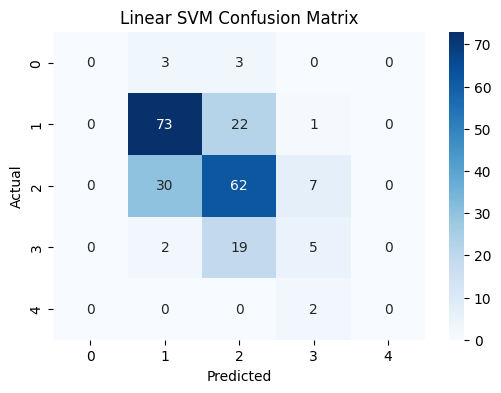

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, cmap='Blues', fmt='d')
plt.title('Linear SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

for non linear svm regession


In [23]:
# Try different kernels
kernels = ['rbf', 'poly', 'sigmoid']

for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {acc:.4f}")


Kernel: rbf, Accuracy: 0.6550
Kernel: poly, Accuracy: 0.6332
Kernel: sigmoid, Accuracy: 0.5590


In [25]:
kernels = ['rbf','poly','sigmoid']
for kernel in kernels:
  svm_model = SVC(kernel=kernel,random_state=42)
  svm_model.fit(X_train_scaled,y_train)
  y_pred = svm_model.predict(X_test_scaled)
  acc = accuracy_score(y_test,y_pred)
  print(f"kernel:{kernel},accuracy:{acc:.4f}")

kernel:rbf,accuracy:0.6550
kernel:poly,accuracy:0.6332
kernel:sigmoid,accuracy:0.5590
